0.08280377570007175
Supremum norm (max divergence): 1.4419470663042389
Point of greatest divergence: [0.001001 0.001001]
Interpolated value at (0.5, 0.5): 0.6848841481288435


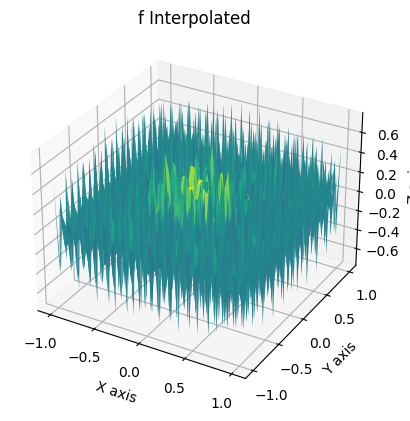

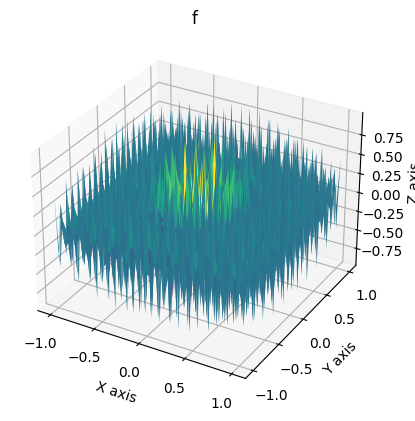

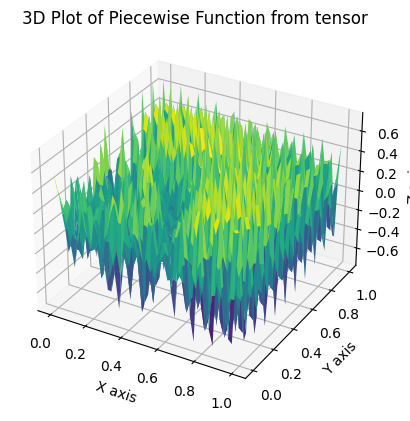

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from Interpolation import func_inter

In [3]:
%matplotlib qt

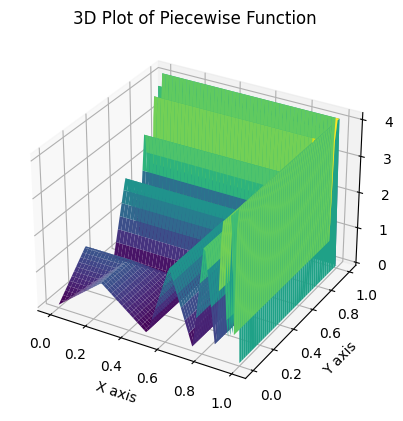

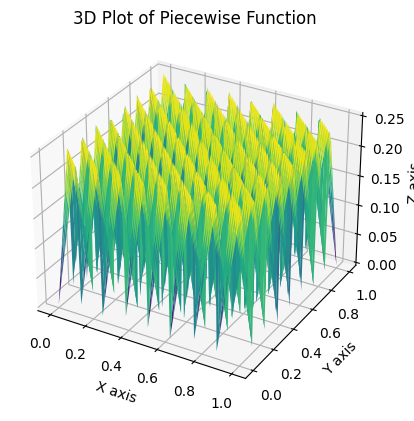

In [2]:
from kan import *
import math
from nice_function import triangle_tensor
from gpt import piecewise_tensor

In [5]:
#f = lambda X:torch.sin(X[:,0] * torch.pi * 2)#*torch.sin(X[:,1] * 100)
n_var = 2
dataset = create_dataset(triangle_tensor, n_var = n_var, train_num=10000, test_num = 1000, ranges = [0,1])
model = KAN(width=[2,4,1], grid=2, k=3)
model.fit(dataset)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.11e-01 | test_loss: 9.01e-01 | reg: 7.87e+01 | : 100%|█| 100/100 [02:38<00:00,  1.58

saving model version 0.1


{'train_loss': [array(0.9708553, dtype=float32),
  array(0.95472944, dtype=float32),
  array(0.9493024, dtype=float32),
  array(0.9423132, dtype=float32),
  array(0.9303809, dtype=float32),
  array(0.939742, dtype=float32),
  array(0.9323311, dtype=float32),
  array(0.92936605, dtype=float32),
  array(0.927665, dtype=float32),
  array(0.926158, dtype=float32),
  array(0.93523425, dtype=float32),
  array(0.933855, dtype=float32),
  array(0.9317486, dtype=float32),
  array(0.93004537, dtype=float32),
  array(0.9284176, dtype=float32),
  array(0.93032247, dtype=float32),
  array(0.9285096, dtype=float32),
  array(0.92737263, dtype=float32),
  array(0.92637485, dtype=float32),
  array(0.9257764, dtype=float32),
  array(0.92737573, dtype=float32),
  array(0.9268093, dtype=float32),
  array(0.9266579, dtype=float32),
  array(0.9261028, dtype=float32),
  array(0.92463636, dtype=float32),
  array(0.92679346, dtype=float32),
  array(0.9259744, dtype=float32),
  array(0.92541724, dtype=float32),

In [4]:
model = model.refine(20)
model.fit(dataset, opt="Adam", steps=200)

NameError: name 'model' is not defined

In [4]:
def piecewise_function(x, y):
    norm = np.sqrt(x**2 + y**2)
    if norm < 1:
        return norm
    else:
        return 2 - norm 

In [5]:
def piecewise_func_data(X):
    norm = torch.norm(X, dim = 1)
    norm[norm >= 1] = 2 - norm[norm >= 1]
    return norm


In [6]:
def plot_model(model,i = None):
    grids = np.array([3,10,20,50,100])
    x = np.linspace(0, 1, 50)  # Example range for x
    y = np.linspace(0, 1, 50)  # Example range for y

    # Generate meshgrid
    X, Y = np.meshgrid(x, y)

    # Flatten the two meshgrid arrays
    X_flat = X.flatten()
    Y_flat = Y.flatten()

    # Concatenate into a single array of shape (x, 2), where x is the number of points
    mesh_data = np.stack((X_flat, Y_flat), axis=1)
    output = model(torch.tensor(mesh_data, dtype = torch.float32))
    Z = output.reshape(50, 50)
    print(Z[0,0], X[0,0], Y[0,0])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.detach().numpy(), cmap='viridis', edgecolor='none')
    print(Z.shape)
    # Add labels and a color bar
    if i:
        ax.set_title(f'3D Surface Plot of f(x, y) with Grid {grids[i]}')
    else:
        ax.set_title('3D Surface Plot of f(x, y)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')

    # Show the plot
    plt.show()

In [7]:
def model_routine(model, dataset):
    model.fit(dataset, opt="LBFGS", steps=10, update_grid = False)
    plot_model(model)
    return model
    
def test_refinment(model, dataset):    
    model = model.refine(10)
    model.fit(dataset, opt="LBFGS", steps=20)
    plot_model(model)
    return model

In [8]:
def model_refinement(shape, dataset):
    grids = np.array([3,10,20,50])

    models = []
    train_losses = []
    test_losses = []
    steps = 200
    k = 3
    
    for i in range(grids.shape[0]):
        if i == 0:
            model = KAN(width=shape, grid=3, k=3, seed=0)
        if i != 0:
            model = model.refine(grids[i])
        results = model.fit(dataset, opt="LBFGS", steps=steps)
        train_losses += results['train_loss']
        test_losses += results['test_loss']
        models.append(model)
        #plot_model(model)
    plt.plot(train_losses)
    plt.plot(test_losses)
    plt.legend(['train', 'test'])
    plt.ylabel('RMSE')
    plt.xlabel('step')
    plt.yscale('log')
    plt.show()
    return models, train_losses, test_losses

In [9]:
import dill
def save_model(model, filename):
    with open(r"saves/" + filename, 'wb') as file:  # 'wb' stands for write binary
        dill.dump(model, file)

def load_from_pickle(filename):
    with open(r"saves/" + filename, 'rb') as file:  # 'rb' stands for read binary
        obj = dill.load(file)
    return obj

In [10]:
piecewise_func_data(torch.tensor(np.array([[0,0],[1,1],[0.5, 0.1],[0.9,0.4]])))

tensor([0.0000, 0.5858, 0.5099, 0.9849], dtype=torch.float64)

In [11]:
vectorized_function = np.vectorize(piecewise_function)
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = vectorized_function(X, Y)

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of Piecewise Function')

# Show the plot
plt.show()

In [13]:
f = lambda x: torch.norm(x, dim = 1)

In [14]:
def f(X):
    """Example continuous function."""
    #return np.exp(np.sin(x**2 + y**2) + np.exp(y**2))
    epsilon = 0.001
    return torch.sin(1 / (X[:,0]**2 + X[:,1]**2 + epsilon)) * torch.cos(20 * np.pi * X[:,0]) * torch.cos(20 * torch.pi * X[:,0])

In [15]:
f = lambda X:torch.sin(X[:,0] * torch.pi * 2)#*torch.sin(X[:,1] * 100)
n_var = 2
dataset = create_dataset(f, n_var = 1, train_num=10000, test_num = 1000, ranges = [0,1])
#dataset = create_dataset(f, n_var = 2, train_num=10000, test_num=1000)
#dataset = create_dataset(f, n_var = 2)

In [16]:
#model = KAN(width=[2,5,5,5,5,1], grid=3, k=3, seed=0)
L = 4
N = 5
#N_width = int(math.ceil(math.sqrt(N**2 *L)))
N_width = int(math.ceil(n_var * N + (L-1) * N**2 + N) / (n_var + 1))
layers_width_depth = [N for _ in range(L+2)]
layers_width_depth[0] = n_var 
layers_width_depth[L+1] = 1
layers_width=[n_var, N_width,1]
print(layers_width_depth, layers_width)


[2, 5, 5, 5, 5, 1] [2, 30, 1]


In [18]:
#model_width = KAN(width=layers_width, grid=3, k=3, seed=0)
model_with_and_depth = KAN(width=[1,2,1], grid=2, grid_range=[0,1], k=3, base_fun='zero', grid_eps = 0)
## Results in Grid such that [0, 0.5, 1]

checkpoint directory created: ./model
saving model version 0.0


In [19]:
for layers in model_with_and_depth.act_fun:
    if test:
        test = False
    #    continue
    print(layers.grid)
    y,_,_,_ =layers(X)

Parameter containing:
tensor([[-1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,  2.0000,
          2.5000]])


AttributeError: 'numpy.ndarray' object has no attribute 'clone'

In [20]:
model_with_and_depth.grid

2

In [21]:
model_with_and_depth = model_routine(model_with_and_depth, dataset)

| train_loss: 3.20e-02 | test_loss: 3.10e-02 | reg: 0.00e+00 | :  20%|▏| 2/10 [00:08<00:33,  4.24s/i


KeyboardInterrupt: 

In [ ]:
X = torch.linspace(-0.5,1.5,1000)
X = X.reshape([X.shape[0],1])
X.shape
plt.plot(X.detach(),model_with_and_depth(X).detach())


In [ ]:
## Kanlayer.coef
# MultKan.
test = 0
for i,layers in enumerate(model_with_and_depth.act_fun):
    if i != test:
        continue
    print(layers.coef)
    print(layers.grid)
    y,_,_,_ =layers(X)
    #print(layers.scale_sp)
    plt.plot(X.detach(),y.detach())
    plt.show()


    #plt.show()

    

Parameter containing:
tensor([[[ 0.0386, -0.0331, -0.0145]]], requires_grad=True)
Parameter containing:
tensor([[-0.5000,  0.0000,  0.5000,  1.0000,  1.5000]])


In [ ]:
test = 1
for i,layers in enumerate(model_with_and_depth.act_fun):
    if i != test:
        continue
    print(layers.coef)
    print(layers.grid)
    y,_,_,_ =layers(X)
    #print(layers.scale_sp)
    plt.plot(X.detach(),y.detach())
    plt.show()

Parameter containing:
tensor([[[-0.0706,  0.0450, -0.0154]]], requires_grad=True)
Parameter containing:
tensor([[-0.5000,  0.0000,  0.5000,  1.0000,  1.5000]])


In [ ]:
model_with_and_depth.plot()

In [ ]:
model_width = model_routine(model_width, dataset)


    

NameError: name 'model_width' is not defined

In [ ]:
model_width = test_refinment(model_width, dataset)

saving model version 0.2


| train_loss: 3.27e-02 | test_loss: 3.61e-02 | reg: 3.49e+01 | : 100%|█| 20/20 [04:08<00:00, 12.43s/

saving model version 0.3
tensor(0.0336, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


In [ ]:
#model_width.plot()

In [ ]:
model_with_and_depth = model_routine(model_with_and_depth, dataset)

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 5.05e-01 | test_loss: 5.30e-01 | reg: 7.14e+00 | : 100%|█| 20/20 [00:14<00:00,  1.34it


saving model version 0.1
tensor(-0.0305, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


In [ ]:
model_with_and_depth = test_refinment(model_with_and_depth, dataset)

saving model version 0.2


| train_loss: 4.67e-01 | test_loss: 5.09e-01 | reg: 2.85e+01 | : 100%|█| 20/20 [03:22<00:00, 10.15s/


saving model version 0.3
tensor(-0.4258, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


In [ ]:
def save_all_models(model_array, filename_appendix):
    grids = np.array([3,10,20,50,100])
    for i,model in enumerate(model_array):
        filename = filename_appendix + 'Grid_' + str(grids[i]) + '.pkl'
        save_model(model, filename)

In [ ]:
models, train_losses, test_losses = model_refinement(layers_width, dataset)

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 5.06e-02 | test_loss: 5.25e-02 | reg: 4.34e+01 | : 100%|█| 200/200 [23:26<00:00,  7.03


saving model version 0.1
saving model version 0.2


| train_loss: 2.64e-02 | test_loss: 3.19e-02 | reg: 4.84e+01 | : 100%|█| 200/200 [40:32<00:00, 12.16


saving model version 0.3
saving model version 0.4


| train_loss: 1.68e-02 | test_loss: 2.81e-02 | reg: 4.81e+01 | : 100%|█| 200/200 [1:00:34<00:00, 18.


saving model version 0.5
saving model version 0.6


| train_loss: 5.56e-03 | test_loss: 2.73e-02 | reg: 4.77e+01 | : 100%|█| 200/200 [1:56:53<00:00, 35.

saving model version 0.7


In [ ]:
save_all_models(models, "Width_interval")
    

In [ ]:
for i,model in enumerate(models):
    plot_model(model,i)

tensor(-0.1321, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(0.0711, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(-0.0798, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(-0.0450, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


In [ ]:
models_wd, train_losses_wd, test_losses_wd = model_refinement(layers_width_depth, dataset)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.87e-01 | test_loss: 5.26e-01 | reg: 3.57e+01 | : 100%|█| 200/200 [22:38<00:00,  6.79


saving model version 0.1
saving model version 0.2


| train_loss: 3.55e-01 | test_loss: 4.31e-01 | reg: 3.94e+01 | : 100%|█| 200/200 [24:13<00:00,  7.27


saving model version 0.3
saving model version 0.4


| train_loss: 2.58e-01 | test_loss: 3.85e-01 | reg: 4.05e+01 | : 100%|█| 200/200 [33:35<00:00, 10.08


saving model version 0.5
saving model version 0.6


| train_loss: 1.33e-01 | test_loss: 4.11e-01 | reg: 4.10e+01 | : 100%|█| 200/200 [1:23:52<00:00, 25.

saving model version 0.7


In [ ]:
save_all_models(models_wd, "DepthandWidth_interval")

In [ ]:
for i,model in enumerate(models_wd):
    plot_model(model,i)

tensor(-1.5848, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(-0.0154, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(-1.6168, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(0.8072, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


In [ ]:
dataset = create_dataset(triangle_tensor, n_var = n_var, train_num=10000, test_num = 1000, ranges = [0,1])
models_flat_width, train_losses_flat_width, test_losses_flat_width = model_refinement([2,5,1], dataset)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.21e-01 | test_loss: 8.04e-01 | reg: 3.47e+01 | : 100%|█| 200/200 [04:58<00:00,  1.49


saving model version 0.1
saving model version 0.2


| train_loss: 6.93e-01 | test_loss: 7.31e-01 | reg: 3.59e+01 | : 100%|█| 200/200 [07:27<00:00,  2.24


saving model version 0.3
saving model version 0.4


| train_loss: 5.79e-01 | test_loss: 6.27e-01 | reg: 3.54e+01 | : 100%|█| 200/200 [10:47<00:00,  3.24


saving model version 0.5
saving model version 0.6


| train_loss: 4.63e-01 | test_loss: 5.31e-01 | reg: 3.57e+01 | : 100%|█| 200/200 [22:02<00:00,  6.61

saving model version 0.7


In [ ]:
for i,model in enumerate(models_flat_width):
    plot_model(model,i)

tensor(0.2707, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(-0.5006, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(0.2570, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])
tensor(0.3313, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


In [ ]:
model(dataset['train_input'])
model.plot()

In [ ]:
model.fit(dataset, opt="LBFGS", steps=20)

| train_loss: 3.18e-01 | test_loss: 3.14e-01 | reg: 2.17e+01 | : 100%|█| 20/20 [00:32<00:00,  1.64s/

saving model version 0.1


{'train_loss': [array(0.3426752, dtype=float32),
  array(0.32398254, dtype=float32),
  array(0.3166468, dtype=float32),
  array(0.31413493, dtype=float32),
  array(0.3119884, dtype=float32),
  array(0.3282607, dtype=float32),
  array(0.32402772, dtype=float32),
  array(0.32097325, dtype=float32),
  array(0.3184645, dtype=float32),
  array(0.3175537, dtype=float32),
  array(0.3242215, dtype=float32),
  array(0.32316202, dtype=float32),
  array(0.3223226, dtype=float32),
  array(0.32146773, dtype=float32),
  array(0.32042986, dtype=float32),
  array(0.32268977, dtype=float32),
  array(0.32161215, dtype=float32),
  array(0.32053173, dtype=float32),
  array(0.31866398, dtype=float32),
  array(0.3178775, dtype=float32)],
 'test_loss': [array(0.33955672, dtype=float32),
  array(0.3247792, dtype=float32),
  array(0.31732893, dtype=float32),
  array(0.31504774, dtype=float32),
  array(0.31180996, dtype=float32),
  array(0.32860717, dtype=float32),
  array(0.32215172, dtype=float32),
  array(0.

In [ ]:
model.plot()
plt.show()

In [ ]:
plot_model(model)

tensor(0.2556, grad_fn=<SelectBackward0>) -1.0 -1.0
torch.Size([50, 50])


In [ ]:
#model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01)

| train_loss: 1.01e-01 | test_loss: 9.95e-02 | reg: 1.08e+01 | : 100%|█| 20/20 [00:31<00:00,  1.57s/

saving model version 0.2


{'train_loss': [array(0.13191833, dtype=float32),
  array(0.12447356, dtype=float32),
  array(0.12135197, dtype=float32),
  array(0.11490896, dtype=float32),
  array(0.11269739, dtype=float32),
  array(0.10970604, dtype=float32),
  array(0.10479181, dtype=float32),
  array(0.10547152, dtype=float32),
  array(0.10338693, dtype=float32),
  array(0.10343729, dtype=float32),
  array(0.1030909, dtype=float32),
  array(0.10218829, dtype=float32),
  array(0.10244222, dtype=float32),
  array(0.10275494, dtype=float32),
  array(0.10330345, dtype=float32),
  array(0.10300353, dtype=float32),
  array(0.10318846, dtype=float32),
  array(0.10151058, dtype=float32),
  array(0.10060438, dtype=float32),
  array(0.10092299, dtype=float32)],
 'test_loss': [array(0.13382821, dtype=float32),
  array(0.12560242, dtype=float32),
  array(0.12098173, dtype=float32),
  array(0.11456838, dtype=float32),
  array(0.1118933, dtype=float32),
  array(0.10912739, dtype=float32),
  array(0.10443308, dtype=float32),
  

In [ ]:
model = model.refine(10)

saving model version 0.2


In [ ]:
model.fit(dataset, opt="LBFGS", steps=20)

| train_loss: 2.98e-01 | test_loss: 3.05e-01 | reg: 2.36e+01 | : 100%|█| 20/20 [00:50<00:00,  2.50s/

saving model version 0.3


{'train_loss': [array(0.30796483, dtype=float32),
  array(0.3050681, dtype=float32),
  array(0.30333635, dtype=float32),
  array(0.30231082, dtype=float32),
  array(0.30173257, dtype=float32),
  array(0.30170816, dtype=float32),
  array(0.3009037, dtype=float32),
  array(0.30034447, dtype=float32),
  array(0.2999699, dtype=float32),
  array(0.29971567, dtype=float32),
  array(0.29972655, dtype=float32),
  array(0.2993767, dtype=float32),
  array(0.29904228, dtype=float32),
  array(0.2988433, dtype=float32),
  array(0.29871428, dtype=float32),
  array(0.29857716, dtype=float32),
  array(0.2984321, dtype=float32),
  array(0.29833934, dtype=float32),
  array(0.29826283, dtype=float32),
  array(0.2981926, dtype=float32)],
 'test_loss': [array(0.3087315, dtype=float32),
  array(0.3080113, dtype=float32),
  array(0.30582023, dtype=float32),
  array(0.30626062, dtype=float32),
  array(0.30566448, dtype=float32),
  array(0.30866826, dtype=float32),
  array(0.30846724, dtype=float32),
  array(0

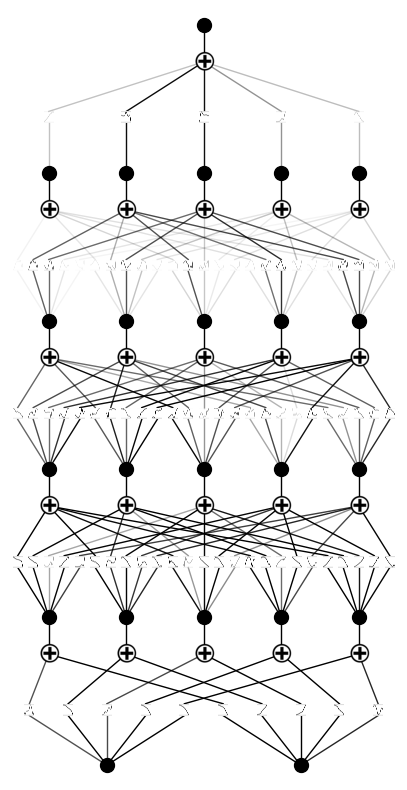

tensor(0.0644, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


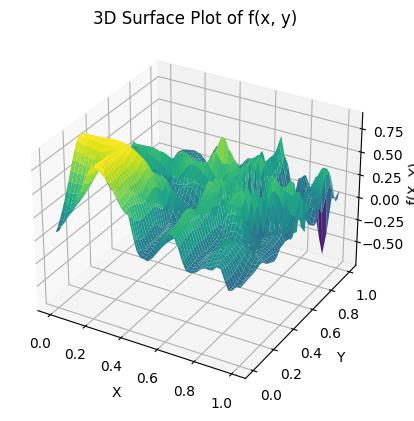

In [ ]:
model.plot()
plt.show()
plot_model(model)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.67e-03 | test_loss: 1.03e-01 | reg: 1.31e+02 | : 100%|█| 200/200 [09:52<00:00,  2.96


saving model version 0.1
tensor(0.0676, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


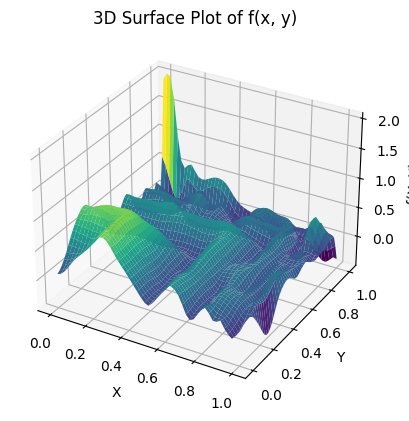

saving model version 0.2


| train_loss: 8.69e-04 | test_loss: 3.44e-01 | reg: 1.53e+02 | : 100%|█| 200/200 [16:25<00:00,  4.93


saving model version 0.3
tensor(0.0615, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


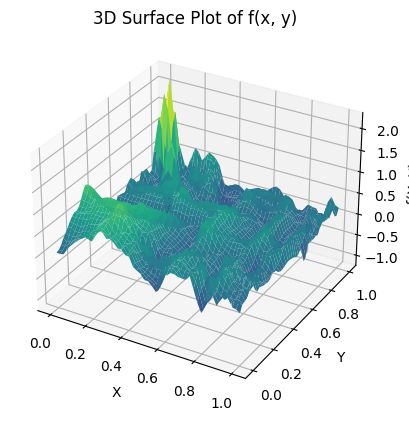

saving model version 0.4


| train_loss: 2.64e-04 | test_loss: 3.12e-01 | reg: 1.60e+02 | : 100%|█| 200/200 [17:29<00:00,  5.25


saving model version 0.5
tensor(0.0916, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


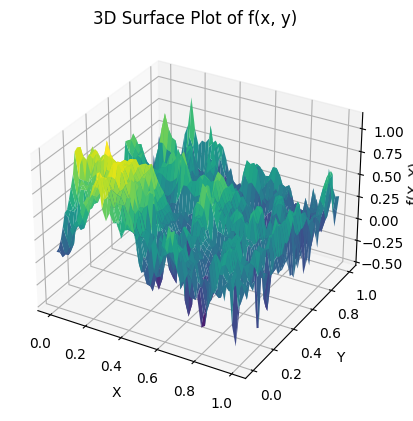

In [ ]:
grids = np.array([3,10,20])


train_losses = []
test_losses = []
steps = 200
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,20,20,20,20,20,1], grid=3, k=3, seed=0)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']
    plot_model(model)


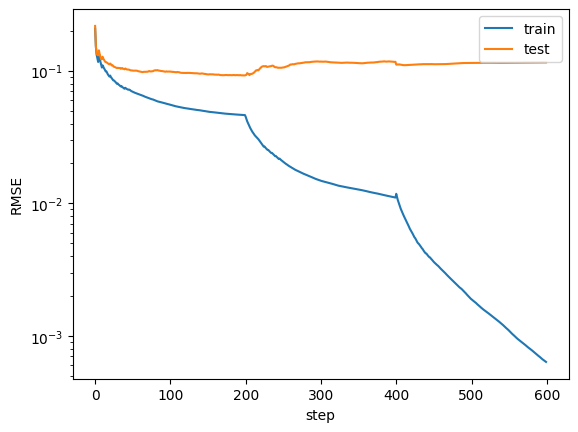

In [ ]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

tensor(-0.0267, grad_fn=<SelectBackward0>) 0.0 0.0
torch.Size([50, 50])


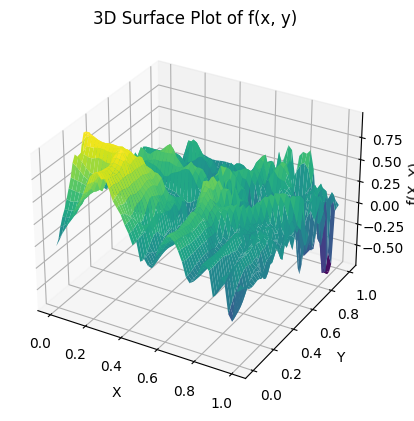

In [ ]:
plot_model(model)

Text(0, 0.5, 'RMSE')

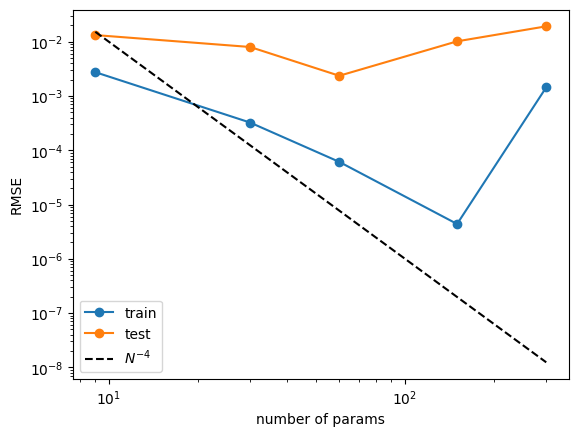

In [ ]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

In [ ]:
model = model.rewind('0.2')

rewind to model version 4.2, renamed as 5.2
